In [0]:
# http://pytorch.org/
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu90' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.0-{platform}-linux_x86_64.whl torchvision
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import math

In [2]:
from google.colab import files
uploaded = files.upload() # then browse, select the files. It's then uploaded
# choose plot_conf.py

Saving plot_conf.py to plot_conf.py


In [0]:
%run ~/plot_conf.py
plt_style()

# Here we will:
* Construct a model $f(x)$ with parameters $\theta$
* Train it to learn a simple function $y = x^2$ by gradient descent
* We do this by minimizing a loss function $\mathcal{L}(\theta) = \|x_i^2 - f(x_i) \|$ for many random points $x_i$ 
* Visualize the function that it learns


Gradient descent works as follows:

* Randomly initialize model parameters $\theta$
* Repeat: $\theta_{t+1} \leftarrow \theta_t - \alpha \frac{\partial \mathcal{L}}{\partial \theta}$







# Initialize the Model

Text(0,0.5,'y')

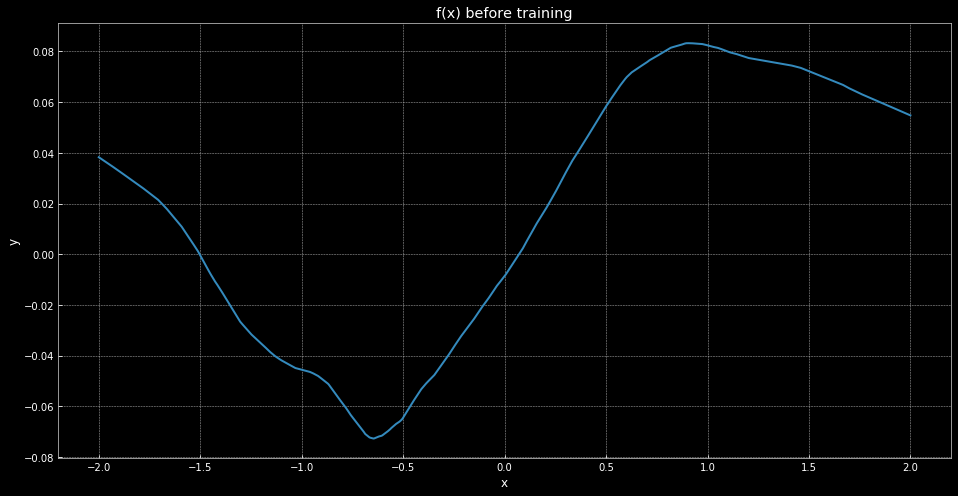

In [32]:
n_hidden = 100 #100 nodes per hidden layer
model = nn.Sequential(
        nn.Linear(1, n_hidden), #1 input, 1st hidden layer(100 nodes)
        nn.ReLU(), #activation function 
        nn.Linear(n_hidden, n_hidden), #output from 1st hidden layer, 2nd hidden layer(100 nodes)
        nn.ReLU(), 
        nn.Linear(n_hidden, 1) #output from 2nd hidden layer (100), 1 output
        )

x = torch.linspace(-2, 2, 1000).reshape(-1, 1)
y = model(x)
plt.plot(x.data.numpy(), y.data.numpy())
plt.title('f(x) before training')
plt.xlabel('x')
plt.ylabel('y')

# Train the Model

* Sample random points $x_i \in [-2, 2]$
* Minimize network weights with respect to $\mathcal{L}(\theta) = \sum_i \|x_i^2 - f(x_i) \|$ 

Text(0,0.5,'loss')

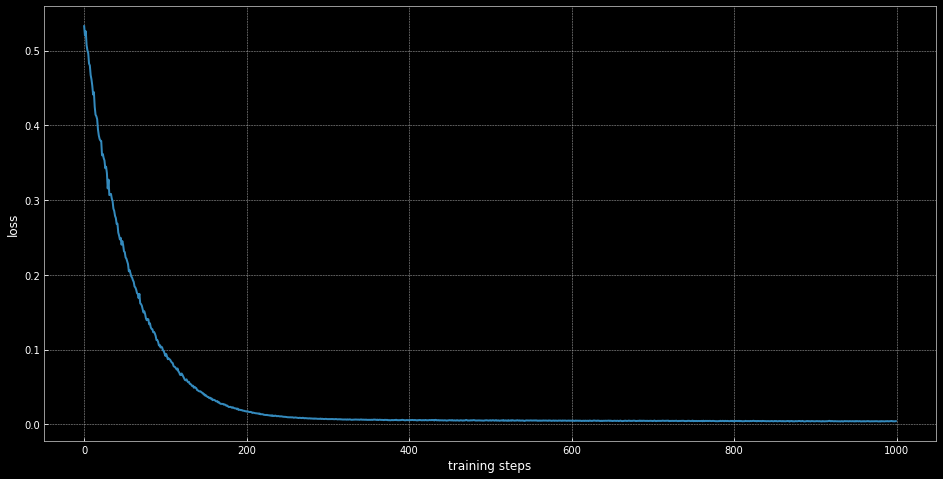

In [33]:
learning_rate = 0.001
batch_size = 2000 #more batch the longer time for computation 
optimizer = optim.SGD(model.parameters(), learning_rate) #(weightValuesInModel(para), learning rate)
loss = []
for t in range(1000):
    # sample points in [-2, 2]
    x = 4*(torch.rand(batch_size, 1) - 0.5) #creat 100 random points between -2 to 2
    x = x.view(-1, 1)
    y = model(x)
    current_loss = F.mse_loss(y, torch.sin(x))
    
    # Backward and optimize
    model.zero_grad()
    current_loss.backward()
    optimizer.step()
    loss.append(current_loss.item())
    
plt.plot(loss)
plt.xlabel('training steps')
plt.ylabel('loss')

# Show the Learned Function

Let's compare the learned function to the true one on the interval $[-2, 2]$:

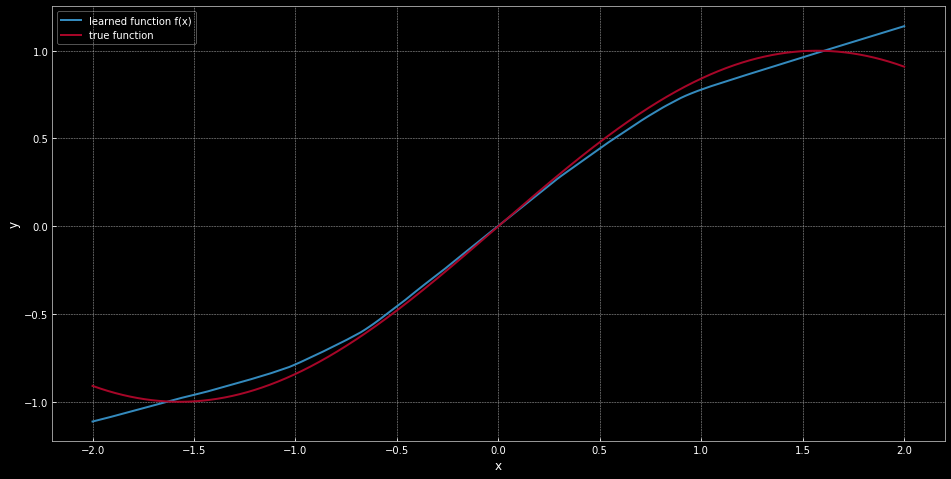

In [34]:
x = torch.linspace(-2, 2, 1000).reshape(-1, 1)
y = model(x)
x = x.squeeze()
y = y.squeeze()
y_true = torch.sin(x)
plt.plot(x.data.numpy(), y.data.numpy())
plt.plot(x.data.numpy(), y_true.data.numpy())
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['learned function f(x)', 'true function'])

# What about on a larger interval?

Now let's compare on a larger interval $[-5, 5]$:

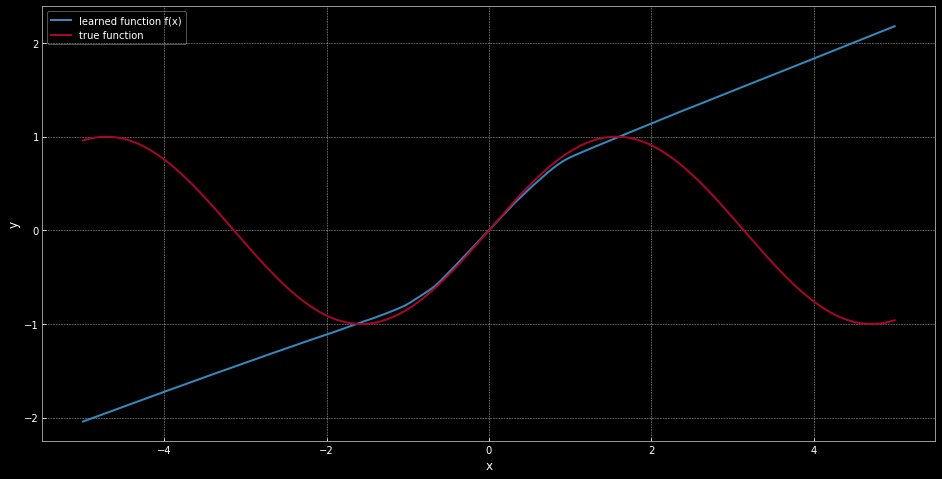

In [38]:
x = torch.linspace(-5, 5, 1000).reshape(-1, 1)
y = model(x)
x = x.squeeze()
y = y.squeeze()
y_true = torch.sin(x)
plt.plot(x.data.numpy(), y.data.numpy())
plt.plot(x.data.numpy(), y_true.data.numpy())
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['learned function f(x)', 'true function'])

* We only trained the function on points $x \in [-2, 2]$. 
* For new points within this interval, the learned function is very close to the true one
* However for points outside, it is no longer accurate

* Generalization to new domains is a big challenge in machine learning